<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# PANDAS! For Exploratory Data Analysis

<img src="https://media2.giphy.com/media/EatwJZRUIv41G/giphy.gif?cid=790b76115cf944375a2f654d2eae90eb&rid=giphy.gif" style="float: center; margin: 10px; height: 300px">
---


## Learning Objectives

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` 
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Know how to handle null and missing values.

<a id="pandas"></a>

## Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. (**Challenge:** Using only built-in datatypes, can you define `cars` and `mpg` to make this expression valid?)

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

## Pandas

In [2]:
# Load Pandas into Python & Matplotlib


<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

In [4]:
# Read "u.user" into "users".
df = pd.read_table('user.tbl', sep = '|')

/Users/heatherrobbins/env3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


**Examine the users data.**

In [6]:
# Print the first 30 and last 30 rows.


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [1]:
# Examine column types


In [2]:
# Print the first five rows.


In [3]:
# Print the first 10 rows.


In [4]:
# Print the last five rows.


In [10]:
 # The row index - start and end indices
df.index            

RangeIndex(start=0, stop=943, step=1)

In [ ]:
#show column names

In [13]:
# Number of rows and columns

In [14]:
# All values 
df.values

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [29]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


** Select or index data.**<br>
Pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  
In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [6]:
# Select a column — return the values


In [22]:
# you can also call specific columns this way:
    
df.gender.head()


0    M
1    F
2    M
3    M
4    F
Name: gender, dtype: object

**Summarize (describe) the data.**<br>
Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [35]:
# Describe all numeric columns.


,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [36]:
# Describe all object columns (can include multiple types).
df.describe(include=['object'])

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [37]:
# Describe all columns, including non-numeric.
df.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [30]:
# Describe a single column 


In [7]:
# Calculate the mean of the ages.



In [8]:
# Draw a histogram of a column (the distribution of ages).


**Count the number of occurrences of each value.**

In [39]:
# display the categorical variables in the gender column
# Most useful for categorical variables



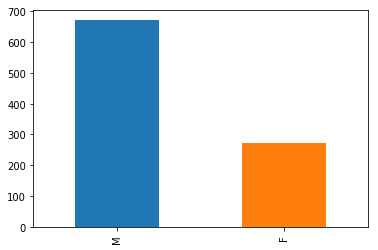

In [36]:
df.gender.value_counts().plot(kind='bar')     # Quick plot by category

(array([  8., 101., 197., 221., 123., 115., 111.,  36.,  23.,   8.]),
 array([ 7. , 13.6, 20.2, 26.8, 33.4, 40. , 46.6, 53.2, 59.8, 66.4, 73. ]),
 <a list of 10 Patch objects>)

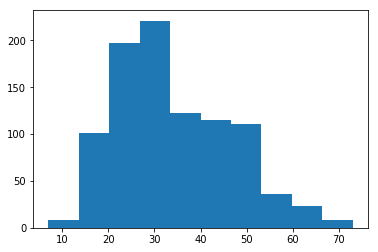

In [44]:
# value counts can also be used with numeric variables
#   Try .sort_values() to sort by counts.


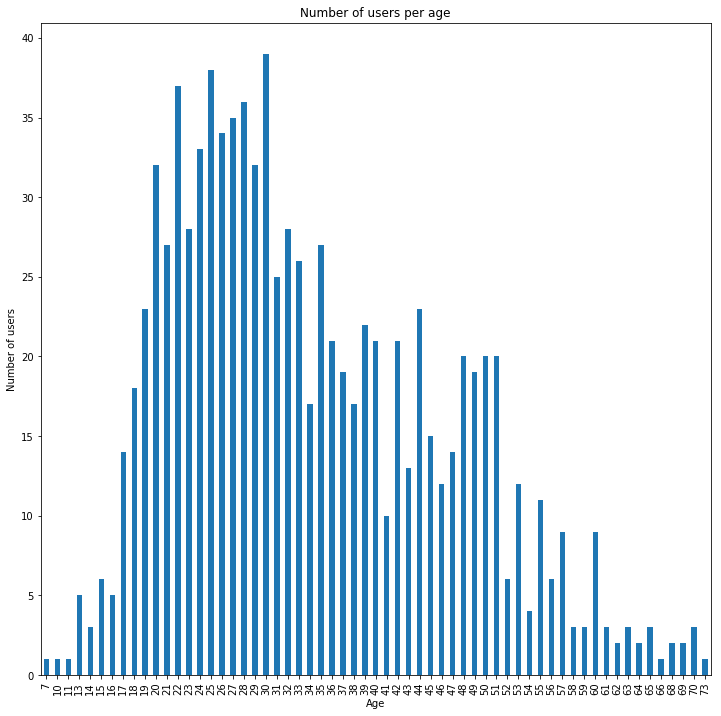

In [46]:
df.age.value_counts().sort_index().plot(kind='bar', figsize=(12,12));     # Bigger plot by increasing age
plt.xlabel('Age');
plt.ylabel('Number of users');
plt.title('Number of users per age');

(array([  8., 101., 197., 221., 123., 115., 111.,  36.,  23.,   8.]),
 array([ 7. , 13.6, 20.2, 26.8, 33.4, 40. , 46.6, 53.2, 59.8, 66.4, 73. ]),
 <a list of 10 Patch objects>)

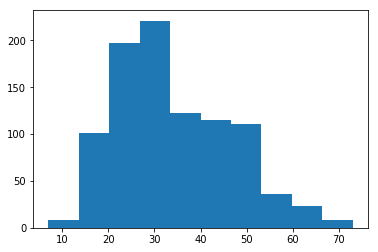

In [47]:
#can also create simple histogram:

plt.hist(df.age)

<a id="exercise-one"></a>
### Exercise 1

In [45]:
# Read drinks.csv into a DataFrame called "drinks".
import pandas as pd
drinks = pd.read_csv('data/drinks.csv')

In [46]:
# Print the head and the tail.
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
# Examine the default column names, datatypes and shape of the dataframe.


In [50]:
# Examine the beer_servings column.


In [ ]:
# Calculate the average beer_servings for the entire data set.


In [ ]:
# Count the number of occurrences of each "continent" value and see if it looks correct.


<a id="filtering-and-sorting"></a>
### Filtering and Sorting
- **Objective:** Filter and sort data using Pandas.

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

**Logical filtering: Only show users with age < 20.**

In [54]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.
young_bool = df.age < 20
young_bool

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
913    False
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924     True
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
Name: age, Length: 943, dtype: bool

In [57]:
# …and use that Series to filter rows.
# In Pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True in the Boolean.
df[young_bool].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402


In [59]:
# Or, combine into a single step.
df[df.age < 20].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402


In [71]:
# Important: This creates a view of the original DataFrame, not a new DataFrame.
# If you alter this view (e.g., by storing it in a variable and altering that), then it will alter the original DataFrame.
df = df.copy()

users_under20 = df[df.age < 20]   #now this is our new filtered dataframe


In [72]:
users_under20.head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402


In [73]:
# Select one column from the filtered results.
users_under20['occupation']

29           student
35           student
51           student
56              none
66           student
67           student
100          student
109          student
141            other
178    entertainment
205          student
220          student
222          student
245          student
256          student
257          student
261          student
269          student
280          student
288             none
290          student
302          student
319          student
340          student
346          student
366          student
367          student
374    entertainment
392          student
396          student
           ...      
600           artist
608          student
617          student
618          student
619           writer
620          student
623          student
627             none
630          student
631          student
641          student
645          student
673          student
699          student
709          student
728          student
746          

In [74]:
# value_counts of resulting Series
users_under20.occupation.value_counts()

student          64
other             4
none              3
writer            2
entertainment     2
artist            1
salesman          1
Name: occupation, dtype: int64

**Logical filtering with multiple conditions**

In [48]:
# Ampersand for `AND` condition. 
# Important: You MUST put parentheses around each expression.
df[(df.age < 20) & (df.gender=='M')]

#you could make this a new dataframe too by setting it to a variable name

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755
220,221,19,M,student,20685
245,246,19,M,student,28734


In [50]:
# Pipe for `OR` condition. 
# Important: You MUST put parentheses around each expression because `|` has a higher precedence than `<`.
df[(df.age < 20) | (df.age > 60)]

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
105,106,61,M,retired,55125
109,110,19,M,student,77840
141,142,13,M,other,48118


In [51]:
# isin - if you're looking for specific characteristics in a column
df[df.occupation.isin(['doctor', 'lawyer'])]

,user_id,age,gender,occupation,zip_code
9,10,53,M,lawyer,90703
124,125,30,M,lawyer,22202
125,126,28,F,lawyer,20015
137,138,46,M,doctor,53211
160,161,50,M,lawyer,55104
204,205,47,M,lawyer,06371
250,251,28,M,doctor,85032
298,299,29,M,doctor,63108
338,339,35,M,lawyer,37901
364,365,29,M,lawyer,20009


**Sorting**

In [86]:
#sort a column in the df
ages = df['age'].value_counts().sort_values()

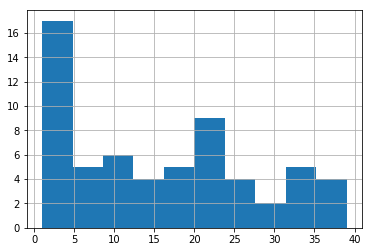

In [87]:
ages.hist()  #can plot the age distribution

In [79]:
# Sort a DataFrame by a single column.
df.sort_values('age')

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
879,880,13,M,student,83702
608,609,13,F,student,55106
141,142,13,M,other,48118
673,674,13,F,student,55337
627,628,13,M,none,94306
812,813,14,F,student,02136
205,206,14,F,student,53115


In [89]:
# Use descending order instead.
df.sort_values('age', ascending=False).head()

,user_id,age,gender,occupation,zip_code
480,481,73,M,retired,37771
802,803,70,M,administrator,78212
766,767,70,M,engineer,00000
859,860,70,F,retired,48322
584,585,69,M,librarian,98501


In [90]:
# Sort by multiple columns.
df.sort_values(['occupation', 'age']).head()

,user_id,age,gender,occupation,zip_code
117,118,21,M,administrator,90210
179,180,22,F,administrator,60202
281,282,22,M,administrator,20057
316,317,22,M,administrator,13210
438,439,23,F,administrator,20817


<a id="exercise-two"></a>
### Exercise 2
Use the `drinks.csv` or `drinks` `DataFrame` from earlier to complete the following.

In [ ]:
# Filter DataFrame to only include European countries.

In [ ]:
# Filter DataFrame to only include European countries with wine_servings > 300.

In [ ]:
# Calculate the average beer_servings for all of Europe.

**Removing Columns**

In [ ]:
# axis=0 for rows, 1 for columns
drinks.drop('mL', axis=1)

In [ ]:
# Drop multiple columns.
drinks.drop(['mL', 'servings'], axis=1)

In [ ]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

<a id="missing-values"></a>
### Handling Missing Values

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [ ]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

In [ ]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

In [ ]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull()

In [ ]:
# Count the missing values — sum() works because True is 1 and False is 0.
drinks.continent.isnull().sum()

In [ ]:
# True if not missing, False if missing
drinks.continent.notnull()

In [ ]:
# Only show rows where continent is not missing.
drinks[drinks.continent.notnull()]

**Find missing values in a `DataFrame`.**

In [ ]:
# DataFrame of Booleans
drinks.isnull()

In [ ]:
# Count the missing values in each column — remember by default, axis=0.
print((drinks.isnull().sum()))

drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

**Dropping Missing Values**

In [ ]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna()

In [ ]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all')

**Filling Missing Values**<br>
You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [ ]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
drinks.continent.fillna(value='NA')

In [ ]:
# Modifies "drinks" in-place
drinks.continent.fillna(value='NA', inplace=True)

In [ ]:
# Turn off the missing value filter — this is a better approach!
drinks = pd.read_csv('../data/drinks.csv', header=0, names=drink_cols, na_filter=False)